In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
import re
!{sys.executable} -m pip install WordCloud
from wordcloud import WordCloud
# NOTE:这里面读取的csv文件名要和doubanScraper.ipynb里写的csv文件名一致
csv = pd.read_csv(r'rencai_1_76.csv')

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


### 计算帖子数量；

In [2]:
topic_url = csv.topic_url
topic_url_filter = [i for i in topic_url if str(i).split(':')[0] == 'https']
topic_nums = list(set(topic_url_filter))
print('帖子总数为：', len(topic_nums))

帖子总数为： 1430


### 计算每月发帖数量；

In [3]:
time = csv.time
time_topicUrl = [[t, u] for t, u in zip(time, topic_url)]
time_topicUrl_filter = [i for i in time_topicUrl if str(i[1]).split(':')[0] == 'https']
topicUrl_time_filter_dict = dict([[i[1], i[0]] for i in time_topicUrl_filter])
# this is to handle both of the following time format: a) 06-09 10:31, b) 2018-04-02
topic_time = [i.split('-')[-2] for i in list(topicUrl_time_filter_dict.values())]
topic_time_dict = dict(Counter(topic_time))
topic_time_dict_sorted = sorted([[int(i), j] for i, j in topic_time_dict.items()], key=lambda x:x[0])


In [4]:
#可视化每月发帖数量；

x = [i[0] for i in topic_time_dict_sorted]
y = [i[1] for i in topic_time_dict_sorted]

x_ = tuple([str(i) for i in x])

# plt.plot(x, y, 'b*-')
# plt.xticks(x, x_)
# plt.yticks(fontsize=10)
# plt.xlabel('Month')
# plt.ylabel('Number of posts', fontsize=10)
# #plt.legend()

# # plt.savefig(r'1.png', dpi=1000)

# plt.show()

print('每月发帖数量为', y)

每月发帖数量为 [1430]


### 计算每天发帖数量；

In [5]:
#计算哪天发帖最多；
topic_without_time = [i.split(' ')[0] for i in list(topicUrl_time_filter_dict.values())]
topic_time_day = ['.'.join(i.split('-')[1:]) for i in topic_without_time]
topic_time_day_dict = dict(Counter(topic_time_day))
topic_time_day_dict_sorted = sorted([[i, j] for i, j in topic_time_day_dict.items()], key=lambda x:x[1], reverse=True)

In [6]:
#可视化每天发帖数量（前10）；

x = [i[0] for i in topic_time_day_dict_sorted[:10]]
y = [i[1] for i in topic_time_day_dict_sorted[:10]]

x_ = tuple([str(i) for i in x])

# plt.plot(x, y, '^-')
# plt.xticks(x, x_)
# plt.yticks(fontsize=10)
# plt.xlabel('Day')
# plt.ylabel('Number of posts', fontsize=10)
# #plt.legend()

# # plt.savefig(r'2.png', dpi=1000)

# plt.show()

print('以天为粒度，发帖前数量为x：', y)

以天为粒度，发帖前数量为x： [927, 503]


### 计算用户发帖数量分布；

In [7]:
id_url = csv.id
topic_id = [[u, i] for i, u in zip(id_url, topic_url)]
topic_id_filter = [i for i in topic_id if str(i[0]).split(':')[0] == 'https']
id_topic_filter_dict = dict(topic_id_filter)
id_filter = sorted([[i, j]for i, j in dict(Counter(list(id_topic_filter_dict.values()))).items()], key=lambda x:x[1], reverse=True)

print('发帖数量前20的rcer：')
for i in id_filter[:20]:
    print(i)

发帖数量前20的rcer：
['https://www.douban.com/people/d87267026/', 13]
['https://www.douban.com/people/yanjipingping/', 13]
['https://www.douban.com/people/216392334/', 11]
['https://www.douban.com/people/174748786/', 10]
['https://www.douban.com/people/148305464/', 9]
['https://www.douban.com/people/199347405/', 9]
['https://www.douban.com/people/204088098/', 9]
['https://www.douban.com/people/196385708/', 8]
['https://www.douban.com/people/239510280/', 8]
['https://www.douban.com/people/178002025/', 8]
['https://www.douban.com/people/235207363/', 7]
['https://www.douban.com/people/198127218/', 7]
['https://www.douban.com/people/198960300/', 7]
['https://www.douban.com/people/235041455/', 7]
['https://www.douban.com/people/122549213/', 7]
['https://www.douban.com/people/Yh0531ID/', 6]
['https://www.douban.com/people/238823775/', 6]
['https://www.douban.com/people/212615146/', 6]
['https://www.douban.com/people/235351145/', 6]
['https://www.douban.com/people/234056609/', 6]


In [8]:
print('共有', len(id_filter), '位用户发帖')

共有 940 位用户发帖


### 计算收藏量前20的帖子

In [9]:
# 计算收藏前20的帖子: 
favorite_count = csv.favourite_count
topic_favourite = [[i, u] for i, u in zip(topic_url, favorite_count)]
topic_favourite_filter = [i for i in topic_favourite if str(i[0]).split(':')[0] == 'https']
favourite_topic_filter_dict = dict(topic_favourite_filter)
favourite_filter = sorted(favourite_topic_filter_dict.items(), key=lambda x:int(x[1]), reverse=True)
print('收藏数量前20的帖子：')
for i in favourite_filter[:20]:
    print(i)

收藏数量前20的帖子：
('https://www.douban.com/group/topic/221772651/', '7363')
('https://www.douban.com/group/topic/227810366/', '3616')
('https://www.douban.com/group/topic/229490871/', '3608')
('https://www.douban.com/group/topic/226161545/', '3105')
('https://www.douban.com/group/topic/220714352/', '2383')
('https://www.douban.com/group/topic/229343092/', '1758')
('https://www.douban.com/group/topic/226011777/', '1632')
('https://www.douban.com/group/topic/226312337/', '1391')
('https://www.douban.com/group/topic/226881611/', '1381')
('https://www.douban.com/group/topic/139303623/', '1290')
('https://www.douban.com/group/topic/226348125/', '1253')
('https://www.douban.com/group/topic/229990607/', '1120')
('https://www.douban.com/group/topic/213139790/', '1088')
('https://www.douban.com/group/topic/214341492/', '905')
('https://www.douban.com/group/topic/215930307/', '842')
('https://www.douban.com/group/topic/229510981/', '681')
('https://www.douban.com/group/topic/229665850/', '606')
('http

### 计算点赞量前20的帖子

In [10]:
# 计算点赞前20的帖子: 
like_count = csv.like_count
topic_like = [[i, u] for i, u in zip(topic_url, like_count)]
topic_like_filter = [i for i in topic_like if str(i[0]).split(':')[0] == 'https']
like_topic_filter_dict = dict(topic_like_filter)
like_filter = sorted(like_topic_filter_dict.items(), key=lambda x:int(x[1]), reverse=True)
print('点赞数量前20的帖子：')
for i in like_filter[:20]:
    print(i)

点赞数量前20的帖子：
('https://www.douban.com/group/topic/221772651/', '2957')
('https://www.douban.com/group/topic/215930307/', '1890')
('https://www.douban.com/group/topic/214341492/', '1726')
('https://www.douban.com/group/topic/213139790/', '1532')
('https://www.douban.com/group/topic/229490871/', '1258')
('https://www.douban.com/group/topic/220714352/', '827')
('https://www.douban.com/group/topic/226312337/', '822')
('https://www.douban.com/group/topic/227810366/', '815')
('https://www.douban.com/group/topic/229990607/', '709')
('https://www.douban.com/group/topic/229665850/', '695')
('https://www.douban.com/group/topic/229343092/', '646')
('https://www.douban.com/group/topic/229024039/', '588')
('https://www.douban.com/group/topic/226881611/', '532')
('https://www.douban.com/group/topic/229665724/', '524')
('https://www.douban.com/group/topic/229666969/', '469')
('https://www.douban.com/group/topic/229667008/', '441')
('https://www.douban.com/group/topic/229510981/', '431')
('https://www.

### 计算转发量前20的帖子

In [11]:
# 计算转发前20的帖子: 
sharing_count = csv.sharing_ocunt
topic_sharing = [[i, u] for i, u in zip(topic_url, sharing_count)]
topic_sharing_filter = [i for i in topic_sharing if str(i[0]).split(':')[0] == 'https']
sharing_topic_filter_dict = dict(topic_sharing_filter)
sharing_filter = sorted(sharing_topic_filter_dict.items(), key=lambda x:int(x[1]), reverse=True)
print('转发数量前20的帖子：')
for i in sharing_filter[:20]:
    print(i)

转发数量前20的帖子：
('https://www.douban.com/group/topic/226161545/', '438')
('https://www.douban.com/group/topic/221772651/', '398')
('https://www.douban.com/group/topic/229343092/', '291')
('https://www.douban.com/group/topic/229490871/', '284')
('https://www.douban.com/group/topic/214341492/', '283')
('https://www.douban.com/group/topic/226881611/', '149')
('https://www.douban.com/group/topic/229990607/', '133')
('https://www.douban.com/group/topic/220714352/', '125')
('https://www.douban.com/group/topic/213139790/', '123')
('https://www.douban.com/group/topic/139303623/', '116')
('https://www.douban.com/group/topic/227810366/', '115')
('https://www.douban.com/group/topic/230124442/', '92')
('https://www.douban.com/group/topic/229665850/', '85')
('https://www.douban.com/group/topic/226011777/', '81')
('https://www.douban.com/group/topic/228546552/', '80')
('https://www.douban.com/group/topic/229923355/', '75')
('https://www.douban.com/group/topic/229473022/', '66')
('https://www.douban.com/

### 计算回帖用户数量分布及最赞回复用户数量；

In [12]:
reply_id = list(csv.reply_id) # reply_id是回应用户的id
topic_replyId= [[j, i] for i, j in zip(reply_id, topic_url)]
topic_replyId_dict = dict([i for i in topic_replyId if str(i[0]).split(':')[0] == 'https'])

topic_replyId_ = []
for key, value in topic_replyId_dict.items():
    v_re = re.split(r'["\']', value)
    v_re_ = []
    for v in v_re:
        if v not in ['[', ', ', ']', '[]']:
            v_re_.append(v)
    topic_replyId_.append([key, v_re_])

popular_idx = list(csv.popular_index) # count of most popular replies
topic_popularIdx = [[j, i] for i, j in zip(popular_idx, topic_url)]
topic_popularIdx_dict = dict([i for i in topic_popularIdx if str(i[0]).split(':')[0] == 'https'])

topic_replyIdList_dict = dict(topic_replyId_)

replyIdPopuAll_list = []
replyIdAll_list = []
for k, v in topic_popularIdx_dict.items():
    # k is topic url, v is count of popular replies
    try:
        replyIdPopu_list = topic_replyIdList_dict[k][:int(v)]
        replyId_list = topic_replyIdList_dict[k][int(v):] #有最赞的用户id会被加到list两次，从最赞后面开始算，防止最赞用户被算两次
    except:
        continue
    replyIdPopuAll_list.append(replyIdPopu_list)
    replyIdAll_list.append(replyId_list)
    
replyIdPopuAll_list_ = sorted([[i, j] for i, j in dict(Counter([j for i in replyIdPopuAll_list for j in i])).items()], key=lambda x:x[1], reverse=True)
replyIdAll_list_ = sorted([[i, j] for i, j in dict(Counter([j for i in replyIdAll_list for j in i])).items()], key=lambda x:x[1], reverse=True)
  
print('最赞回复前20的rcer：')
for i in replyIdPopuAll_list_[:20]: # NOTE: 可以改前X名的, 比如你想要前30，就把这行的20改成30，下面几个算前X名的cell同理。
    print(i)

最赞回复前20的rcer：
['https://www.douban.com/people/150158475/', 39]
['https://www.douban.com/people/238943559/', 30]
['https://www.douban.com/people/140864112/', 30]
['https://www.douban.com/people/188163813/', 29]
['https://www.douban.com/people/168505285/', 26]
['https://www.douban.com/people/223235014/', 21]
['https://www.douban.com/people/Yh0531ID/', 19]
['https://www.douban.com/people/188381523/', 18]
['https://www.douban.com/people/125830681/', 18]
['https://www.douban.com/people/196385708/', 18]
['https://www.douban.com/people/128492371/', 18]
['https://www.douban.com/people/167257329/', 17]
['https://www.douban.com/people/213882194/', 17]
['https://www.douban.com/people/239510280/', 17]
['https://www.douban.com/people/235391064/', 16]
['https://www.douban.com/people/226695673/', 16]
['https://www.douban.com/people/198127218/', 15]
['https://www.douban.com/people/235351145/', 15]
['https://www.douban.com/people/213467221/', 15]
['https://www.douban.com/people/222372975/', 14]


In [13]:
print('回复数量前20的rcer：')
for i in replyIdAll_list_[:20]:
    print(i)

回复数量前20的rcer：
['https://www.douban.com/people/188163813/', 257]
['https://www.douban.com/people/150158475/', 209]
['https://www.douban.com/people/196385708/', 195]
['https://www.douban.com/people/213882194/', 182]
['https://www.douban.com/people/238885806/', 174]
['https://www.douban.com/people/148305464/', 160]
['https://www.douban.com/people/168505285/', 157]
['https://www.douban.com/people/213467221/', 148]
['https://www.douban.com/people/238943559/', 147]
['https://www.douban.com/people/235351145/', 142]
['https://www.douban.com/people/235207363/', 136]
['https://www.douban.com/people/239510280/', 129]
['https://www.douban.com/people/199347405/', 128]
['https://www.douban.com/people/223235014/', 122]
['https://www.douban.com/people/85140746/', 121]
['https://www.douban.com/people/159151849/', 120]
['https://www.douban.com/people/149208000/', 118]
['https://www.douban.com/people/163654814/', 117]
['https://www.douban.com/people/188381523/', 115]
['https://www.douban.com/people/15463

### 计算回复数量前20的帖子；

In [14]:
responses_num = list(csv.responses_num)
topic_responseNum = [[j, i] for i, j in zip(responses_num, topic_url)]
topic_responseNum_dict = dict([i for i in topic_responseNum if str(i[0]).split(':')[0] == 'https'])

topic_replyIdNums_dict = dict([[i[0], len(i[1])] for i in topic_replyId_])

topic_responseNum_dict_ = []
for i, j in topic_responseNum_dict.items():
    try:
        j = int(j)
        topic_responseNum_dict_.append([i, j])
    except:
        continue

topic_responseNum_sorted = sorted([[i, j] for i, j in dict(topic_responseNum_dict_).items()], key=lambda x:x[1], reverse=True)
topic_responseNum_filter = [[i[0], i[1]] for i in topic_responseNum_sorted if topic_replyIdNums_dict[i[0]] > 2]

print('回复数量前20的帖子：')
for i in topic_responseNum_filter[:20]:
    print(i)

回复数量前20的帖子：
['https://www.douban.com/group/topic/214341492/', 521235]
['https://www.douban.com/group/topic/203399574/', 27977]
['https://www.douban.com/group/topic/226161545/', 18914]
['https://www.douban.com/group/topic/215930307/', 13235]
['https://www.douban.com/group/topic/215444772/', 8170]
['https://www.douban.com/group/topic/229343092/', 7023]
['https://www.douban.com/group/topic/214288101/', 3931]
['https://www.douban.com/group/topic/163064114/', 3520]
['https://www.douban.com/group/topic/222453068/', 2652]
['https://www.douban.com/group/topic/229024039/', 2505]
['https://www.douban.com/group/topic/213139790/', 2484]
['https://www.douban.com/group/topic/229990607/', 2458]
['https://www.douban.com/group/topic/228449509/', 2243]
['https://www.douban.com/group/topic/228546552/', 2028]
['https://www.douban.com/group/topic/221772651/', 1673]
['https://www.douban.com/group/topic/220714352/', 1608]
['https://www.douban.com/group/topic/229490871/', 1596]
['https://www.douban.com/group/

In [15]:
top2000 = len([i[0] for i in topic_responseNum_sorted if i[1] >= 2000])
top2000_1500 = len([i[0] for i in topic_responseNum_sorted if 1500 <= i[1] < 2000])
top1500_1000 = len([i[0] for i in topic_responseNum_sorted if 1000 <= i[1] < 1500])
top1000_500 = len([i[0] for i in topic_responseNum_sorted if 500 <= i[1] < 1000])
top500_0 = len([i[0] for i in topic_responseNum_sorted if i[1] < 500])

In [16]:
top500_400 = len([i[0] for i in topic_responseNum_sorted if 400 <= i[1] < 500])
top400_300 = len([i[0] for i in topic_responseNum_sorted if 300 <= i[1] < 400])
top300_200 = len([i[0] for i in topic_responseNum_sorted if 200 <= i[1] < 300])
top200_100 = len([i[0] for i in topic_responseNum_sorted if 100 <= i[1] < 300])
top100_0 = len([i[0] for i in topic_responseNum_sorted if 0 <= i[1] < 100])
topMax100 = len([i[0] for i in topic_responseNum_sorted if i[1] > 100])

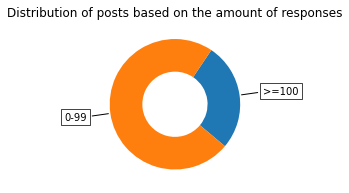

In [17]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ['>=100', '0-99']

data = [topMax100, top100_0]
#data_ = [top500_400, top400_300, top300_200, top200_100, top100_0]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('Distribution of posts based on the amount of responses')

# plt.savefig(r'4.png', dpi=1000)

plt.show()

### 计算rcer的发帖方式及回帖方式；

In [18]:
# topic_ways = list(csv.topic_ways)
# topic_topicWays = [[j, i] for i, j in zip(topic_ways, topic_url)]
# topic_responseNum_dict = dict([i for i in topic_topicWays if str(i[0]).split(':')[0] == 'https'])

# appWay = [j for i, j in topic_responseNum_dict.items() if j == '来自 豆瓣App']
# my_dpi=95
# plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
# plt.pie(x=[2351, 85800],
#         labels=['Unknown', 'Douban App'],
#         colors=["#F08080", "#87CEEB"],
#         autopct='%1.1f%%',
#         explode=(0.2, 0),
#        )
# plt.savefig(r'3.png', dpi=1000)
# plt.show()

In [19]:
# reply_ways = list(csv.replyWays)
# topic_replyWays = [[j, i] for i, j in zip(reply_ways, topic_url)]
# topic_replyWays_dict = dict([i for i in topic_replyWays if str(i[0]).split(':')[0] == 'https'])

# topic_replyWays_list = []

# for k, v in topic_replyWays_dict.items():
#     try:
#         #v_re = re.split(r'["\']', v)
#         v_re = [i for i in re.split(r'["\']', v) if i not in ['[', ', ', ']', '[]']]
#         topic_replyWays_list.append([k, v_re])
#     except:
#         continue

# replyWays_list = [j for i in topic_replyWays_list for j in i[1]]
# Counter(replyWays_list)

In [20]:
# data = [dict(Counter(replyWays_list))[''], dict(Counter(replyWays_list))['来自 豆瓣App']]

# my_dpi=96
# plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
# plt.pie(x=data,
#         labels=['Client', 'Douban App'],
#         colors=["#F08080", "#87CEEB"],
#         autopct='%1.1f%%',
#         explode=(0.2, 0),#某部分突出显示，值越大，距离中心越远，该法可解决饼图字体重叠的问题
#        )
# plt.savefig(r'5.png', dpi=1000)
# plt.show()

### 主贴词云图；

In [30]:
import sys
!{sys.executable} -m pip install jieba
import jieba
docs = list(csv.docs) # 主贴内容, topicDocs_
topic_docs = [[j, i] for i, j in zip(docs, topic_url)]
topic_docs_dict = dict([i for i in topic_docs if str(i[0]).split(':')[0] == 'https'])

words = []
for i in topic_docs_dict.values():
    try:
        word_list = list(jieba.cut(i))
    except:
        continue
    words.extend(word_list)

words_s = ' '.join(words)
with open('baidu_stopwords.txt') as f1, open('cn_stopwords.txt') as f2, open('hit_stopwords.txt') as f3, open('scu_stopwords.txt') as f4:
    content = f1.readlines() + f2.readlines() + f3.readlines() + f4.readlines()
stop_words= list(set(x.strip() for x in content))

wc = WordCloud(font_path=r'ZiZhiQuXiMaiTi-2.ttf',
               background_color='white',
               width=1000,
               height=800,
               stopwords=stop_words
               ).generate(words_s)
#wc.to_file('hahaha.png')

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


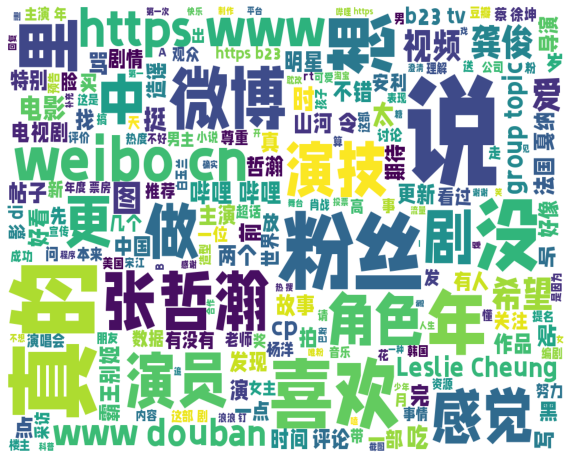

In [31]:
plt.figure(figsize = (10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 回复内容分析；

In [32]:
reply_content = list(csv.reply_content)

topic_replyContent= [[j, i] for i, j in zip(reply_content, topic_url)]
topic_replyContent_dict = dict([i for i in topic_replyContent if str(i[0]).split(':')[0] == 'https'])

reply_words = []
for i in topic_replyContent_dict.values():
    try:
        reply_word_list = list(jieba.cut(i))
    except:
        continue
    reply_words.extend(reply_word_list)

reply_words_s = ' '.join(reply_words)
reply_wc = WordCloud(font_path=r'ZiZhiQuXiMaiTi-2.ttf',
               background_color='white',
               width=5000,
               height=5000,
               stopwords=stop_words
               ).generate(reply_words_s)
#wc.to_file('hahaha.png')


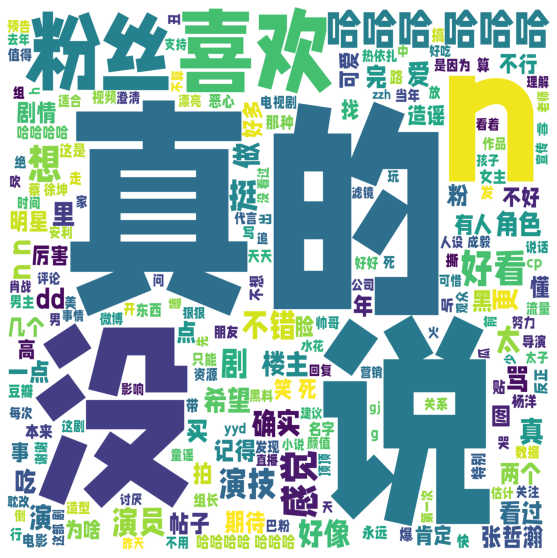

In [33]:
plt.figure(figsize = (10,10))
plt.imshow(reply_wc)
plt.axis('off')
plt.show()

In [25]:
topic_replyContent_ = []
for key, value in topic_replyContent_dict.items():
    try:
        v_rc = re.split(r'["\']', value)
        v_rc_ = []
        for v in v_rc:
            if v not in ['[', ', ', ']', '[]']:
                v_rc_.append(v)
    except:
        v_rc_ = []
    topic_replyContent_.append([key, v_rc_])

topic_replyContent_filter_dict = dict(topic_replyContent_)

replyContent_all = []
for k, v in topic_popularIdx_dict.items():
    try:
        r_c = topic_replyContent_filter_dict[k][int(v):]
        replyContent_all.append(r_c)
    except:
        continue
        
replyContent_all_ = [j for i in replyContent_all for j in i]


In [34]:
# reply_ha = [j for i in replyContent_all_ for j in i]
# reply_ha.count('哈')
#NOTE: 这里面我用了正则表达式定义了抓取的关键字，可以修改成你想要的关键字。
#对python正则表达式不熟悉的可以搜索一下，了解下怎么使用。正则表达式定义的正确与否直接影响到抓取数据的正确性。
#可以自己用在线测试网站测一下自己定义的是不是正确, e.g. https://c.runoob.com/front-end/854 (随便搜的网站，侵权删)
r1 = re.compile(".*(肖战|土豆|那个男人|xz|🥔).*")
filtered_list1 = list(filter(r1.match, replyContent_all_)) 
print("回复含有肖战的数量", len(filtered_list1))
r2 = re.compile(".*(龚俊|\(\)|马|gj|🐴).*")
filtered_list2 = list(filter(r2.match, replyContent_all_)) 
print("回复含有龚俊的数量", len(filtered_list2))
r3 = re.compile(".*(张哲瀚|zzh|fz|组禁|二舅|(?<!土)豆).*")
filtered_list3 = list(filter(r3.match, replyContent_all_)) 
print("回复含有张哲瀚的数量", len(filtered_list3))
r4 = re.compile(".*(蔡徐坤|巨c|巨C|cxk).*")
filtered_list4 = list(filter(r4.match, replyContent_all_)) 
print("回复含有蔡徐坤的数量", len(filtered_list4))
r5 = re.compile(".*(王一博|小吴|脖|wyb|摩托).*")
filtered_list5 = list(filter(r5.match, replyContent_all_)) 
print("回复含有王一博的数量", len(filtered_list5))
r6 = re.compile(".*(热巴|巴巴|dlrb|rb).*")
filtered_list6 = list(filter(r6.match, replyContent_all_)) 
print("回复含有热巴的数量", len(filtered_list6))
r7 = re.compile(".*(羊|杨洋|ymls|羊毛).*")
filtered_list7 = list(filter(r7.match, replyContent_all_)) 
print("回复含有杨洋的数量", len(filtered_list7))

回复含有肖战的数量 301
回复含有龚俊的数量 1010
回复含有张哲瀚的数量 1314
回复含有蔡徐坤的数量 281
回复含有王一博的数量 227
回复含有热巴的数量 256
回复含有杨洋的数量 705


In [27]:
# replyContent_all_idx = []
# for k, v in topic_popularIdx_dict.items():
#     try:
#         r_c = topic_replyContent_filter_dict[k][int(v):]
#         replyContent_all_idx.append([k, r_c])
#     except:
#         continue

In [28]:
# url_haNum = []
# for i in replyContent_all_idx:
#     try:
#         chs = []
#         for j in i[1]:
#             ch = [m for m in j].count('哈')
#             chs.append(ch)
#         url_haNum.append([i[0], max(chs)])
#     except:
#         url_haNum.append([i[0], 0])

In [29]:
# sorted(url_haNum, key=lambda x:x[1], reverse=True)